# Question 3

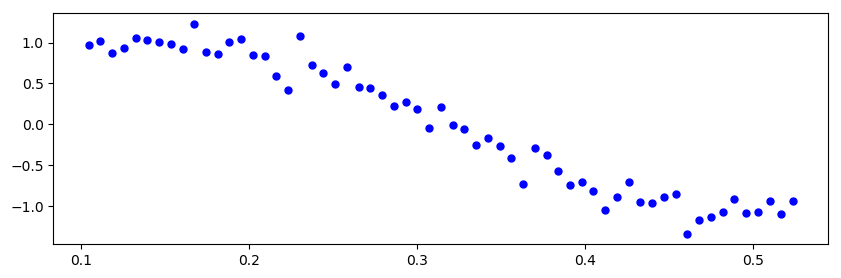

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ffb21107080>

In [32]:
using PyPlot

# Get data
using CSV

# import data set
raw = CSV.read("lasso_data.csv", datarow=1)

xValues = raw[1:end,1];
yValues = raw[1:end,2];

# plot our original data
figure(figsize=(10,3))
plot(xValues,yValues,"b.", markersize=10)

### Part A

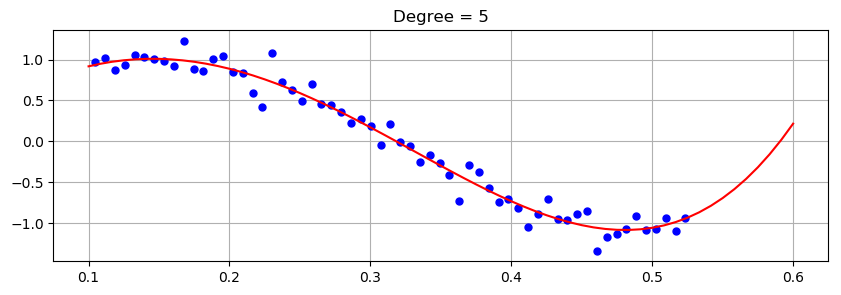

Academic license - for non-commercial use only
Optimal
0.0010160049969020202
Coefficients: [-10.1365, 126.15, -36.2631, -43.2121, 13.3418, 0.0398447]


In [33]:
using JuMP, Gurobi  # order of polynomial to use
using PyPlot

# define degree
k = 5

# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
n = length(xValues)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = xValues[i]^(k+1-j)
    end
end


m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, u[1:k+1])
@objective(m, Min, 1/1000*sum( (yValues - A*u).^2 ) )

status = solve(m)
uopt = getvalue(u)
println(status)
println(getobjectivevalue(m))
println("Coefficients: ",uopt)

npts = length(xValues)
xfine = range(0.1,stop=0.6,length=npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt
figure(figsize=(10,3))
title("Degree = 5")
plot( xValues, yValues, "b.", markersize=10)
plot( xfine, yfine, "r-")
grid()

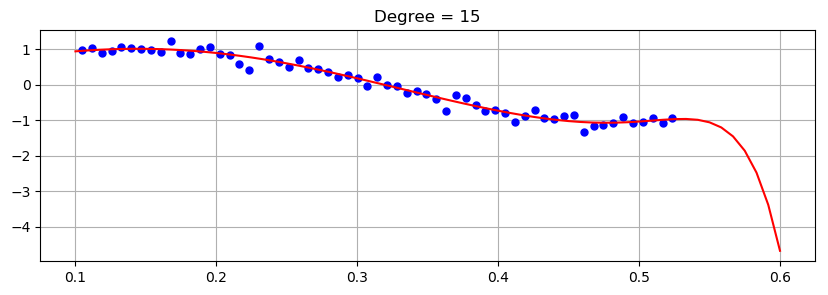

Academic license - for non-commercial use only
Optimal

Objective Value: 0.010136198979191158

Coefficients: [-2.20326e5, 75540.0, 50515.7, 11175.7, -3676.78, -4811.57, -2392.4, -457.146, 348.829, 423.063, 143.808, -45.6042, -42.4133, -20.9276, 8.73743, 0.31421]


In [34]:
using JuMP, Gurobi
using PyPlot

# define degree
k = 15

# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
n = length(xValues)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = xValues[i]^(k+1-j)
    end
end

m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, u[1:k+1])
@objective(m, Min, 1/100*sum( (yValues - A*u).^2 ) )

status = solve(m)
uopt = getvalue(u)
println(status)
println()
println("Objective Value: ", getobjectivevalue(m))
println()
println("Coefficients: ",uopt)

npts = length(xValues)
xfine = range(0.1,stop=0.6,length=npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt
figure(figsize=(10,3))
title("Degree = 15")
plot( xValues, yValues, "b.", markersize=10)
plot( xfine, yfine, "r-")
grid()

#### The coefficients of both degrees are large. The graph looks similar in this interval, but will look differently in a larger interval.  The graphs will not 

### Part B

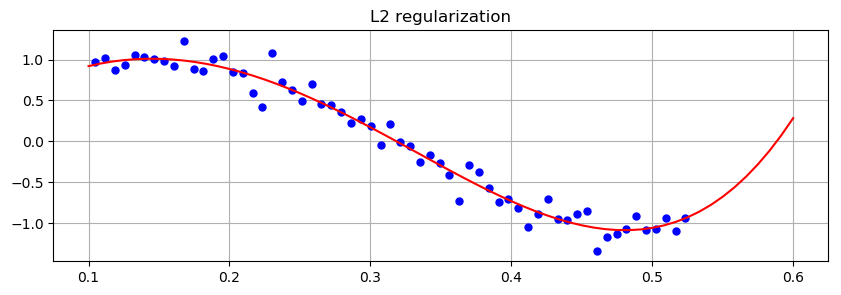

Academic license - for non-commercial use only
Optimal
Objective Value: 1.0234909599347475

Coefficients: [-0.59465, -0.975681, -1.54994, -2.35464, -3.35103, -4.29544, -4.51095, -2.58953, 3.71018, 16.501, 33.9216, 42.0711, 11.6188, -55.0281, 14.6015, -0.00540095]


In [35]:
using JuMP, Gurobi
using PyPlot

# define degree
k = 15

λ = 10^(-6); # Given regularization parameter is small

A = zeros(n,k+1)
for i = 1:length(xValues)
    for j = 1:k+1
        A[i,j] = xValues[i]^(k+1-j)
    end
end

m = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m, u[1:k+1])

@expression(m, mainObj, sum((yValues - A*u).^2))
@expression(m, R, sum(u.^2)) # L2 regularization

@objective(m, Min, mainObj + λ*R)

print(solve(m))
uopt = getvalue(u)
println()
println("Objective Value: ", getobjectivevalue(m))
println()
println("Coefficients: ",uopt)

npts = length(xValues)
xfine = range(0.1,stop=0.6,length=npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt
figure(figsize=(10,3))
title("L2 regularization")
plot( xValues, yValues, "b.", markersize=10)
plot( xfine, yfine, "r-")
grid()

#### We can observe that the coefficents of a regularized versus non-regularized function are significantly smaller. Which is what we would expect as our lambda will put stress on one side of hte equation, thus the other will attempt to balance this out.

### Part C

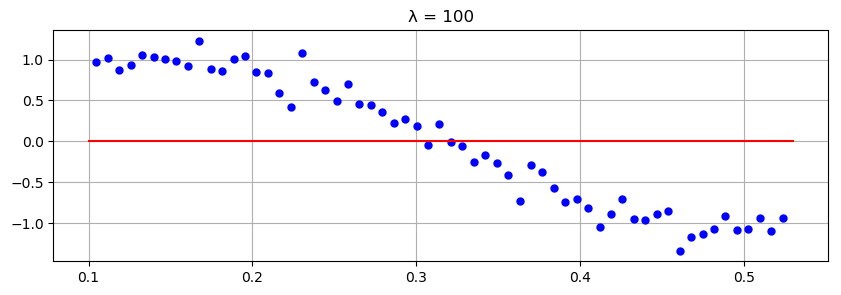

Academic license - for non-commercial use only
Optimal
Objective Value: 39.85611620175039

Coefficients: [-2.07387e-16, -2.09868e-16, -2.14825e-16, -2.24755e-16, -7.62651e-17, -9.87945e-17, -1.44274e-16, -2.36312e-16, -4.2295e-16, -1.21118e-15, -3.02896e-15, -7.108e-15, -1.9829e-14, -4.23059e-14, -1.52735e-13, -5.50122e-14]


In [36]:
using JuMP, Gurobi
using PyPlot

# define degree
k = 15

λ = 100 # change to large value to compare against a small

A = zeros(n,k+1)
for i = 1:length(xValues)
    for j = 1:k+1
        A[i,j] = xValues[i]^(k+1-j)
    end
end

m = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m, u[1:k+1]) 
@variable(m, t[1:k+1]) # Transformation tricks here since JuMP doesn't support abs
@constraint(m, u .<= t )
@constraint(m, -t .<= u )

@expression(m, mainObj, sum((yValues - A*u).^2))
@expression(m, R, sum(t)) # Lasso regularization.

@objective(m, Min, mainObj + λ*R)

print(solve(m))
uopt = getvalue(u)
println()
println("Objective Value: ", getobjectivevalue(m))
println()
println("Coefficients: ",uopt)

npts = length(xValues)
xfine = range(0.1,stop=0.53,length=npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt
figure(figsize=(10,3))
title("λ = 100")
plot( xValues, yValues, "b.", markersize=10)
plot( xfine, yfine, "r-")
grid()

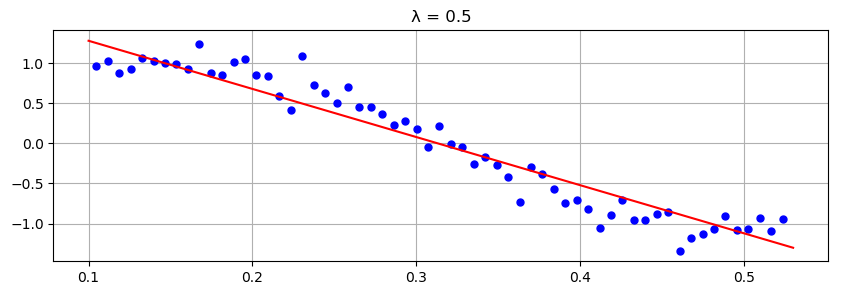

Academic license - for non-commercial use only
Optimal
Objective Value: 6.731226951395733

Coefficients: [-2.0403e-13, -4.0356e-13, -7.98774e-13, -1.5815e-12, -3.13055e-12, -6.18918e-12, -1.21934e-11, -2.3821e-11, -4.5488e-11, -8.03986e-11, -1.43525e-10, -3.6801e-10, -1.55602e-9, -6.56335e-8, -5.99479, 1.87626]


In [37]:
using JuMP, Gurobi
using PyPlot

λ = 0.5 # Try a small value, but not as small as we did first

m = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m, u[1:k+1]) 
@variable(m, t[1:k+1])
@constraint(m, u .<= t )
@constraint(m, -t .<= u )

@expression(m, mainObj, sum((yValues - A*u).^2))
@expression(m, R, sum(t)) # Lasso regularization.

@objective(m, Min, mainObj + λ*R)

print(solve(m))

uopt = getvalue(u)
println()
println("Objective Value: ", getobjectivevalue(m))
println()
println("Coefficients: ",uopt)

npts = length(xValues)
xfine = range(0.1,stop=0.53,length=npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt
figure(figsize=(10,3))
title("λ = 0.5")
plot( xValues, yValues, "b.", markersize=10)
plot( xfine, yfine, "r-")
grid()

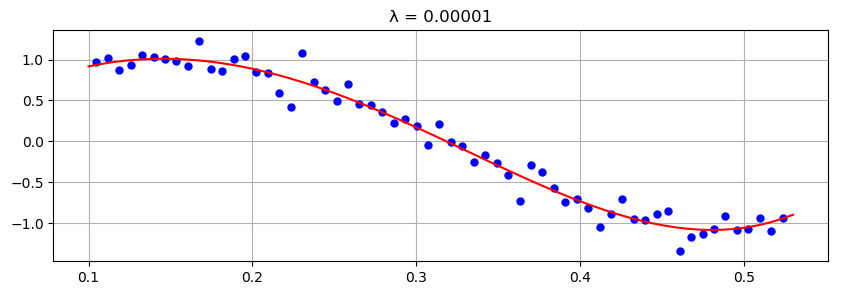

Academic license - for non-commercial use only
Optimal
Objective Value: 1.0181420122538398

Coefficients: [-7.37678e-5, -0.000123692, -0.000206783, -0.000353842, -0.000661777, -0.00163386, -0.332328, -32.5742, -0.00101267, 5.67382e-5, 57.12, 48.6099, -0.00163577, -51.5314, 14.2572, 0.001794]


In [38]:
using JuMP, Gurobi
using PyPlot

λ = 0.00001 # go to a smaller value

m = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m, u[1:k+1]) 
@variable(m, t[1:k+1])
@constraint(m, u .<= t )
@constraint(m, -t .<= u )

@expression(m, mainObj, sum((yValues - A*u).^2))
@expression(m, R, sum(t)) # Lasso regularization.

@objective(m, Min, mainObj + λ*R)

print(solve(m))

uopt = getvalue(u)
println()
println("Objective Value: ", getobjectivevalue(m))
println()
println("Coefficients: ",uopt)

npts = length(xValues)
xfine = range(0.1,stop=0.53,length=npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt
figure(figsize=(10,3))
title("λ = 0.00001")
plot( xValues, yValues, "b.", markersize=10)
plot( xfine, yfine, "r-")
grid()

##### Similar to what was seen in Question 1, the smaller the size of λ is, the better fit a line will be. We will want to contiue pursuing a smaller λ for a smoother transition, and overall better looking graph.  When lambda exerts a lot of stress (is a large number), the best fit line will be next to parallel with the X-axis. Whereas when lambda is small, and there is no stress, the graph will take a smoother pass through our points.